# DBM Mask R-CNN Code

*Upload the unzipped version of the DBM Mask RCNN folder into your Google Drive's "My Drive" before running the code for the first time, or if any of the files inside the folder has been updated*

In [ ]:
!pip uninstall keras-nightly
!pip install h5py==2.10.0
!pip install tensorflow==1.15.0rc2

Found existing installation: keras-nightly 2.5.0.dev2021032900
Uninstalling keras-nightly-2.5.0.dev2021032900:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras/*
    /usr/local/lib/python3.7/dist-packages/keras_nightly-2.5.0.dev2021032900.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/keras/applications/resnet50.py
    /usr/local/lib/python3.7/dist-packages/keras/engine/network.py
    /usr/local/lib/python3.7/dist-packages/keras/engine/topology.py
    /usr/local/lib/python3.7/dist-packages/keras/initializers.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/experimental/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/experimental/preprocessing/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/objectives.py
    /usr/local/lib/python3.7/dist-packages/keras/optimizers/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/optimizers/schedules/__init__.py
    /usr/local/lib/p

### Mounting drive to upload files from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Importing the required libraries for Weights & Biases integration and for Mask R-CNN code

In [ ]:
!pip install keras==2.2.5

import os
import uuid
import random
import xml.etree
import numpy as np
import tensorflow as tf
from numpy import zeros, asarray
from keras.callbacks import ModelCheckpoint

!pip install mrcnn
import mrcnn
import mrcnn.config

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

     |████████████████████████████████| 336 kB 8.6 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


Using TensorFlow backend.


     |████████████████████████████████| 51 kB 330 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54931 sha256=eb9cb7290e2a4fe298750c3769f8b4e46dda6ff2a2139f78a95c037297d1c27c
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn


### Uploading DBM dataset file (with images and XML files) and importing visualize, utils & model Python files

In [ ]:
!unzip "//gdrive//My Drive//DBM Mask RCNN//all insects dataset v2.zip"
!unzip "//gdrive//My Drive//DBM Mask RCNN//Updated New Data resized images.zip"
!cp "/gdrive/My Drive/DBM Mask RCNN/visualize_saveimage_orderedfilename.py" "visualize.py"
!cp "/gdrive/My Drive/DBM Mask RCNN/utils.py" "utils.py"
!cp "/gdrive/My Drive/DBM Mask RCNN/model_savetodrive.py" "model.py"

import visualize
import utils
import model

Archive:  //gdrive//My Drive//DBM Mask RCNN//all insects dataset v2.zip
   creating: all insects dataset v2/annots/
  inflating: all insects dataset v2/annots/1.xml  
  inflating: all insects dataset v2/annots/10.xml  
  inflating: all insects dataset v2/annots/100.xml  
  inflating: all insects dataset v2/annots/101.xml  
  inflating: all insects dataset v2/annots/102.xml  
  inflating: all insects dataset v2/annots/103.xml  
  inflating: all insects dataset v2/annots/104.xml  
  inflating: all insects dataset v2/annots/105.xml  
  inflating: all insects dataset v2/annots/106.xml  
  inflating: all insects dataset v2/annots/107.xml  
  inflating: all insects dataset v2/annots/108.xml  
  inflating: all insects dataset v2/annots/109.xml  
  inflating: all insects dataset v2/annots/11.xml  
  inflating: all insects dataset v2/annots/110.xml  
  inflating: all insects dataset v2/annots/111.xml  
  inflating: all insects dataset v2/annots/112.xml  
  inflating: all insects dataset v2/anno

### DBM Dataset

In [ ]:
def Diff(list1, list2):
    return list(set(list1) - set(list2)) + list(set(list2) - set(list1))

In [ ]:
total_num_data = len(os.listdir("all insects dataset v2/images"))

train_list = [79, 652, 493, 109, 660, 344, 477, 418, 607, 438, 215, 355, 96, 533, 308, 46, 67, 302, 299, 243, 363, 377, 481, 356, 222, 252, 447, 139, 456, 319, 686, 697, 205, 669, 709, 99, 100, 30, 13, 338, 75, 648, 29, 415, 464, 585, 271, 322, 108, 724, 635, 203, 389, 394, 524, 475, 212, 128, 331, 254, 197, 214, 343, 474, 445, 362, 428, 397, 204, 279, 604, 80, 446, 570, 88, 675, 9, 116, 566, 150, 664, 267, 716, 579, 177, 27, 478, 147, 85, 50, 548, 370, 318, 95, 656, 52, 596, 617, 182, 74, 580, 263, 286, 522, 41, 332, 94, 290, 627, 237, 700, 725, 502, 734, 98, 309, 539, 732, 690, 549, 691, 15, 132, 489, 567, 255, 673, 380, 463, 179, 676, 483, 582, 592, 379, 63, 696, 145, 494, 527, 121, 735, 265, 38, 729, 104, 373, 412, 92, 500, 679, 432, 680, 285, 14, 91, 328, 151, 160, 39, 227, 49, 115, 102, 127, 282, 250, 269, 557, 514, 43, 534, 424, 449, 106, 210, 378, 161, 225, 636, 619, 658, 55, 110, 728, 565, 40, 702, 122, 413, 414, 654, 314, 264, 597, 706, 677, 441, 545, 289, 720, 142, 118, 183, 62, 196, 553, 288, 260, 36, 233, 644, 64, 518, 671, 392, 32, 719, 304, 209, 175, 595, 448, 3, 159, 650, 112, 528, 192, 180, 454, 694, 21, 236, 629, 440, 529, 276, 507, 258, 590, 220, 466, 103, 372, 517, 488, 404, 295, 329, 4, 513, 516, 303, 589, 544, 558, 626, 365, 133, 546, 640, 238, 339, 251, 202, 532, 297, 58, 194, 235, 434, 300, 721, 439, 68, 731, 480, 186, 216, 603, 577, 239, 491, 551, 357, 426, 53, 461, 715, 165, 384, 555, 569, 621, 155, 387, 72, 519, 242, 350, 176, 153, 59, 130, 631, 368, 334, 442, 69, 509, 157, 248, 554, 310, 575, 316, 591, 293, 261, 169, 613, 146, 437, 564, 245, 353, 737, 337, 277, 47, 86, 187, 722, 531, 61, 320, 307, 382, 408, 453, 89, 499, 284, 273, 351, 683, 24, 270, 599, 465, 359, 126, 324, 144, 717, 616, 336, 618, 427, 451, 540, 556, 371, 705, 550, 637, 124, 101, 190, 170, 645, 234, 125, 171, 693, 386, 511, 37, 608, 6, 120, 240, 294, 390, 407, 292, 20, 498, 406, 211, 114, 547, 633, 399, 562, 542, 391, 435, 710, 649, 56, 66, 76, 653, 523, 305, 280, 561, 287, 610, 51, 639, 275, 606, 113, 247, 530, 352, 174, 231, 48, 364, 484, 703, 598, 584, 164, 158, 228, 497, 459, 538, 396, 436, 315, 578, 588, 218, 443, 678, 232, 520, 400, 136, 726, 543, 44, 57, 388, 342, 84, 687, 628, 291, 525, 723, 349, 462, 244, 134, 487, 16, 152, 632, 87, 189, 200, 119, 674, 704, 605, 663, 571, 535, 402, 19, 681, 18, 609, 166, 666, 323, 593, 73, 207, 472, 90, 34, 655, 713, 60, 213, 360, 667, 78, 385, 419, 54, 602, 615, 229, 646, 173, 471, 335, 563, 460, 611, 358, 141, 601, 22, 246, 162, 485, 154]
val_list = [733, 354, 259, 506, 256, 450, 541, 374, 167, 576, 473, 274, 178, 143, 383, 321, 623, 486, 416, 31, 581, 662, 469, 425, 457, 536, 594, 624, 651, 135, 420, 455, 193, 33, 625, 661, 185, 670, 129, 25, 219, 369, 689, 70, 83, 537, 107, 583, 395, 140, 422, 278, 26, 301, 376, 515, 298, 348, 479, 168, 417, 586, 495, 685, 620, 375, 230, 188, 206, 184, 470, 492, 510, 156, 327, 123, 405, 503, 501, 444, 701, 736, 468, 12, 727, 612, 81, 10, 572, 131, 398, 512, 458, 333, 8, 707, 393, 77, 634, 403, 257, 266, 504, 71, 367, 718, 35, 638, 552, 181, 641]
test_list = [1, 2, 5, 7, 521, 11, 526, 17, 23, 28, 42, 45, 559, 560, 568, 573, 574, 65, 587, 82, 600, 93, 97, 614, 105, 622, 111, 117, 630, 642, 643, 647, 137, 138, 657, 659, 148, 149, 665, 668, 672, 163, 682, 172, 684, 688, 692, 695, 698, 699, 191, 195, 708, 198, 199, 711, 201, 712, 714, 208, 217, 730, 221, 223, 224, 226, 738, 241, 249, 253, 262, 268, 272, 281, 283, 296, 306, 311, 312, 313, 317, 325, 326, 330, 340, 341, 345, 346, 347, 361, 366, 381, 401, 409, 410, 411, 421, 423, 429, 430, 431, 433, 452, 467, 476, 482, 490, 496, 505, 508]

print("Training dataset:", train_list)
print("Validation dataset:", val_list)
print("Testing dataset:", test_list)

print("\nTotal number of data:", total_num_data)
print("Total number of training data:", len(train_list), "(" + str(len(train_list)/total_num_data*100) + "%)")
print("Total number of validation data:", len(val_list), "(" + str(len(val_list)/total_num_data*100) + "%)")
print("Total number of testing data:", len(test_list), "(" + str(len(test_list)/total_num_data*100) + "%)")

Training dataset: [79, 652, 493, 109, 660, 344, 477, 418, 607, 438, 215, 355, 96, 533, 308, 46, 67, 302, 299, 243, 363, 377, 481, 356, 222, 252, 447, 139, 456, 319, 686, 697, 205, 669, 709, 99, 100, 30, 13, 338, 75, 648, 29, 415, 464, 585, 271, 322, 108, 724, 635, 203, 389, 394, 524, 475, 212, 128, 331, 254, 197, 214, 343, 474, 445, 362, 428, 397, 204, 279, 604, 80, 446, 570, 88, 675, 9, 116, 566, 150, 664, 267, 716, 579, 177, 27, 478, 147, 85, 50, 548, 370, 318, 95, 656, 52, 596, 617, 182, 74, 580, 263, 286, 522, 41, 332, 94, 290, 627, 237, 700, 725, 502, 734, 98, 309, 539, 732, 690, 549, 691, 15, 132, 489, 567, 255, 673, 380, 463, 179, 676, 483, 582, 592, 379, 63, 696, 145, 494, 527, 121, 735, 265, 38, 729, 104, 373, 412, 92, 500, 679, 432, 680, 285, 14, 91, 328, 151, 160, 39, 227, 49, 115, 102, 127, 282, 250, 269, 557, 514, 43, 534, 424, 449, 106, 210, 378, 161, 225, 636, 619, 658, 55, 110, 728, 565, 40, 702, 122, 413, 414, 654, 314, 264, 597, 706, 677, 441, 545, 289, 720, 142, 118,

In [ ]:
class DBMDataset(utils.Dataset):
  
  def load_dataset(self, dataset_dir, mode):
    self.add_class("dataset", 1, "DBM")
    
    images_dir = dataset_dir + '/images/'
    annotations_dir = dataset_dir + '/annots/'
    
    for filename in os.listdir(images_dir):
      image_id = filename.split('.')[0] # removes .jpg/.jpeg from the filename of the image

      if mode == "train" and int(image_id) not in train_list:
        continue

      if mode == "val" and int(image_id) not in val_list:
        continue

      if mode == "test" and int(image_id) not in test_list:
        continue
      
      img_path = images_dir + filename
      ann_path = annotations_dir + image_id + '.xml'
      
      self.add_image('dataset', image_id = image_id, path = img_path, annotation = ann_path)

  def extract_boxes(self, filename):
    tree = xml.etree.ElementTree.parse(filename)
    root = tree.getroot()
    
    boxes = list()
    for box in root.findall('.//bndbox'):
      xmin = int(box.find('xmin').text)
      ymin = int(box.find('ymin').text)
      xmax = int(box.find('xmax').text)
      ymax = int(box.find('ymax').text)
      coors = [xmin, ymin, xmax, ymax]
      boxes.append(coors)
    
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return boxes, width, height
    
  def load_mask(self, image_id):
    info = self.image_info[image_id]
    path = info['annotation']
    boxes, w, h = self.extract_boxes(path)
    masks = zeros([h, w, len(boxes)], dtype = 'uint8')

    class_ids = list()
    for i in range(len(boxes)):
      box = boxes[i]
      row_s, row_e = box[1], box[3]
      col_s, col_e = box[0], box[2]
      masks[row_s:row_e, col_s:col_e, i] = 1
      class_ids.append(self.class_names.index('DBM'))
    return masks, asarray(class_ids, dtype = 'int32')

### Prepare training and validation sets

In [ ]:
mrcnn_train_dataset = DBMDataset()
mrcnn_train_dataset.load_dataset(dataset_dir = 'all insects dataset v2', mode = "train")
mrcnn_train_dataset.prepare()

mrcnn_val_dataset = DBMDataset()
mrcnn_val_dataset.load_dataset(dataset_dir = 'all insects dataset v2', mode = "val")
mrcnn_val_dataset.prepare()

mrcnn_test_dataset = DBMDataset()
mrcnn_test_dataset.load_dataset(dataset_dir = 'all insects dataset v2', mode = "test")
mrcnn_test_dataset.prepare()


mrcnn_gt_train_dataset = DBMDataset()
mrcnn_gt_train_dataset.load_dataset(dataset_dir = 'Updated New Data resized images', mode = "train")
mrcnn_gt_train_dataset.prepare()

mrcnn_gt_val_dataset = DBMDataset()
mrcnn_gt_val_dataset.load_dataset(dataset_dir = 'Updated New Data resized images', mode = "val")
mrcnn_gt_val_dataset.prepare()

mrcnn_gt_test_dataset = DBMDataset()
mrcnn_gt_test_dataset.load_dataset(dataset_dir = 'Updated New Data resized images', mode = "test")
mrcnn_gt_test_dataset.prepare()

In [ ]:
print("Training dataset:", [int(image_id["id"]) for image_id in mrcnn_train_dataset.image_info])
print("Validation dataset:", [int(image_id["id"]) for image_id in mrcnn_val_dataset.image_info])
print("Testing dataset:", [int(image_id["id"]) for image_id in mrcnn_test_dataset.image_info])

print(Diff(train_list, [int(image_id["id"]) for image_id in mrcnn_train_dataset.image_info]))
print(Diff(val_list, [int(image_id["id"]) for image_id in mrcnn_val_dataset.image_info]))
print(Diff(test_list, [int(image_id["id"]) for image_id in mrcnn_test_dataset.image_info]))

Training dataset: [261, 136, 532, 55, 644, 713, 175, 370, 679, 130, 139, 445, 247, 704, 104, 607, 164, 628, 653, 721, 606, 591, 734, 289, 529, 38, 169, 205, 669, 207, 57, 204, 225, 237, 706, 144, 681, 293, 509, 252, 540, 342, 116, 567, 658, 368, 363, 720, 471, 717, 234, 461, 373, 561, 599, 575, 166, 719, 255, 159, 609, 200, 194, 120, 539, 20, 453, 324, 667, 635, 551, 6, 424, 269, 474, 287, 145, 483, 580, 270, 328, 334, 493, 94, 245, 677, 364, 239, 174, 349, 735, 300, 50, 189, 165, 332, 650, 652, 153, 648, 100, 613, 697, 150, 378, 597, 67, 566, 456, 112, 343, 160, 108, 102, 74, 315, 15, 53, 170, 610, 284, 646, 693, 569, 649, 124, 227, 380, 413, 500, 390, 318, 525, 89, 404, 611, 183, 277, 351, 44, 203, 69, 109, 702, 726, 240, 604, 254, 297, 522, 578, 463, 180, 316, 132, 210, 95, 290, 41, 502, 103, 222, 545, 46, 558, 666, 700, 637, 271, 146, 72, 303, 690, 353, 39, 357, 48, 356, 128, 84, 52, 13, 436, 314, 126, 73, 49, 442, 481, 691, 676, 598, 91, 386, 645, 686, 190, 319, 127, 243, 134, 565

### DBM Configuration

In [ ]:
class DBMConfig(mrcnn.config.Config): 
    NAME = "DBM_cfg"

    BACKBONE = "resnet50"

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    NUM_CLASSES = 2 #(background/non-DBM + DBM)

    STEPS_PER_EPOCH = len(train_list) # this value changes according to the number of images in the training dataset

    PRE_NMS_LIMIT = 6000

    RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)
    BACKBONE_STRIDES = [4, 8, 16, 32, 64]

    DETECTION_MIN_CONFIDENCE = 0.5

    DETECTION_MAX_INSTANCES = 1000

DBM_config = DBMConfig()
DBM_config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        1000
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

### Loading the model

In [ ]:
mrcnn_model = model.MaskRCNN(mode = "inference", config = DBM_config, model_dir = './')
mrcnn_model.load_weights("/gdrive/My Drive/DBM Mask RCNN/best_mrcnn_weight.h5", by_name=True)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead

Instructions for updating:
Use `tf.cast` instead.


# Binary Image Classification Model Code

In [ ]:
import cv2
import shutil
import matplotlib.pyplot as plt

from keras import layers
from keras import backend as K
from keras.models import Model
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator

### Creating train, validation & test datasets

In [ ]:
!unzip "//gdrive//My Drive//DBM Mask RCNN//resized with padding binary image classification dataset v2.zip"

Streaming output truncated to the last 5000 lines.
  inflating: binary image classification dataset v2/non-DBM/469-16.png  
  inflating: binary image classification dataset v2/non-DBM/469-17.png  
  inflating: binary image classification dataset v2/non-DBM/469-18.png  
  inflating: binary image classification dataset v2/non-DBM/469-19.png  
  inflating: binary image classification dataset v2/non-DBM/469-2.png  
 extracting: binary image classification dataset v2/non-DBM/469-3.png  
  inflating: binary image classification dataset v2/non-DBM/469-4.png  
  inflating: binary image classification dataset v2/non-DBM/469-5.png  
  inflating: binary image classification dataset v2/non-DBM/469-6.png  
  inflating: binary image classification dataset v2/non-DBM/469-7.png  
  inflating: binary image classification dataset v2/non-DBM/469-8.png  
  inflating: binary image classification dataset v2/non-DBM/469-9.png  
  inflating: binary image classification dataset v2/non-DBM/4-7.png  
  inflating

In [ ]:
os.makedirs('dataset')

os.makedirs('dataset/train')
os.makedirs('dataset/validation')
os.makedirs('dataset/test')

os.makedirs('dataset/train/DBM')
os.makedirs('dataset/validation/DBM')
os.makedirs('dataset/test/DBM')

os.makedirs('dataset/train/non-DBM')
os.makedirs('dataset/validation/non-DBM')
os.makedirs('dataset/test/non-DBM')

In [ ]:
total_DBM = len(os.listdir("binary image classification dataset v2/DBM"))
total_nonDBM = len(os.listdir("binary image classification dataset v2/non-DBM"))

print("Total number of DBMs:", total_DBM)
print("Total number of non-DBMs:", total_nonDBM)
total_images = total_DBM + total_nonDBM
print("Total number of images:", total_DBM + total_nonDBM)

Total number of DBMs: 11154
Total number of non-DBMs: 11154
Total number of images: 22308


In [ ]:
def sort_train_val_test_split(train_list, val_list, test_list):
  
  for filename in os.listdir("binary image classification dataset v2/DBM"):
    if int(filename.split('-')[0]) in val_list:
      shutil.move("binary image classification dataset v2/DBM/" + filename, "dataset/validation/DBM/" + filename)
    elif int(filename.split('-')[0]) in test_list:
      shutil.move("binary image classification dataset v2/DBM/" + filename, "dataset/test/DBM/" + filename)
    elif int(filename.split('-')[0]) in train_list:
      shutil.move("binary image classification dataset v2/DBM/" + filename, "dataset/train/DBM/" + filename)
    else:
      print(filename)

  for filename in os.listdir("binary image classification dataset v2/non-DBM"):
    if int(filename.split('-')[0]) in val_list:
      shutil.move("binary image classification dataset v2/non-DBM/" + filename, "dataset/validation/non-DBM/" + filename)
    elif int(filename.split('-')[0]) in test_list:
      shutil.move("binary image classification dataset v2/non-DBM/" + filename, "dataset/test/non-DBM/" + filename)
    elif int(filename.split('-')[0]) in train_list:
      shutil.move("binary image classification dataset v2/non-DBM/" + filename, "dataset/train/non-DBM/" + filename)
    else:
      print(filename)

In [ ]:
sort_train_val_test_split(train_list, val_list, test_list)

In [ ]:
print("Train Dataset")
print("DBM:", len(os.listdir("dataset/train/DBM")))
print("non-DBM:", len(os.listdir("dataset/train/non-DBM")))
total_train = len(os.listdir("dataset/train/DBM")) + len(os.listdir("dataset/train/non-DBM"))
print("Total:", total_train, "(" + str(total_train/total_images*100) + "%)")

print("\nValidation Dataset")
print("DBM:", len(os.listdir("dataset/validation/DBM")))
print("non-DBM:", len(os.listdir("dataset/validation/non-DBM")))
total_val = len(os.listdir("dataset/validation/DBM")) + len(os.listdir("dataset/validation/non-DBM"))
print("Total:", total_val, "(" + str(total_val/total_images*100) + "%)")

print("\nTest Dataset")
print("DBM:", len(os.listdir("dataset/test/DBM")))
print("non-DBM:", len(os.listdir("dataset/test/non-DBM")))
total_test = len(os.listdir("dataset/test/DBM")) + len(os.listdir("dataset/test/non-DBM"))
print("Total:", total_test, "(" + str(total_test/total_images*100) + "%)")

Train Dataset
DBM: 7953
non-DBM: 7808
Total: 15761 (70.65178411332258%)

Validation Dataset
DBM: 1950
non-DBM: 1675
Total: 3625 (16.249775865160483%)

Test Dataset
DBM: 1251
non-DBM: 1671
Total: 2922 (13.098440021516943%)


In [ ]:
!rm -rf "/content/sample_data"
!rm -rf "/content/binary image classification dataset v2"

In [ ]:
print("Train DBM:", os.listdir("dataset/train/DBM"))
print("Train non-DBM:", os.listdir("dataset/train/non-DBM"))

print("Validation DBM:", os.listdir("dataset/validation/DBM"))
print("Validation non-DBM:", os.listdir("dataset/validation/non-DBM"))

print("Test DBM:", os.listdir("dataset/test/DBM"))
print("Test non-DBM:", os.listdir("dataset/test/non-DBM"))

Train DBM: ['493-488.png', '9-46.png', '41-36.png', '338-7.png', '478-94.png', '540-6.png', '177-2.png', '493-794.png', '98-5.png', '124-53.png', '544-46.png', '478-227.png', '618-1.png', '562-19.png', '79-12.png', '493-411.png', '342-68.png', '24-1.png', '104-175.png', '493-142.png', '686-4.png', '115-1.png', '544-9.png', '478-101.png', '478-465.png', '493-728.png', '300-255.png', '696-6.png', '300-65.png', '300-173.png', '80-13.png', '124-16.png', '554-12.png', '287-1.png', '363-16.png', '517-46.png', '205-233.png', '40-6.png', '84-10.png', '522-26.png', '175-2.png', '120-277.png', '147-4.png', '363-13.png', '104-53.png', '120-24.png', '128-13.png', '289-183.png', '493-51.png', '308-1.png', '493-37.png', '290-42.png', '300-235.png', '602-9.png', '493-97.png', '79-38.png', '478-287.png', '493-839.png', '478-386.png', '205-169.png', '289-46.png', '84-43.png', '290-22.png', '517-56.png', '55-17.png', '478-78.png', '588-2.png', '342-80.png', '183-45.png', '41-33.png', '19-47.png', '289-1

In [ ]:
train_l = []
val_l = []
test_l = []

for name in os.listdir("dataset/train/DBM"):
  train_l.append(int(name.split('-')[0]))

for name in os.listdir("dataset/train/non-DBM"):
  train_l.append(int(name.split('-')[0]))

for name in os.listdir("dataset/validation/DBM"):
  val_l.append(int(name.split('-')[0]))

for name in os.listdir("dataset/validation/non-DBM"):
  val_l.append(int(name.split('-')[0]))

for name in os.listdir("dataset/test/DBM"):
  test_l.append(int(name.split('-')[0]))

for name in os.listdir("dataset/test/non-DBM"):
  test_l.append(int(name.split('-')[0]))

print(Diff(train_list, train_l))
print(Diff(val_list, val_l))
print(Diff(test_list, test_l))

for num in train_l:
  if num in val_list or num in test_list:
    print("train:", num)

for num in val_l:
  if num in train_l or num in test_list:
    print("val:", num)

for num in test_l:
  if num in val_list or num in train_l:
    print("test:", num)

[379]
[]
[]


### Resizing and creating datasets to pass to the model

In [ ]:
train = ImageDataGenerator(rescale = 1/255, rotation_range = 30, zoom_range = 0.2, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)
#train = ImageDataGenerator(rescale = 1/255)
val = ImageDataGenerator(rescale = 1/255)

classifier_train_dataset = train.flow_from_directory("dataset/train/",
                                                     target_size = (150,150),
                                                     batch_size = 64,
                                                     classes = ['non-DBM', 'DBM'],
                                                     class_mode = 'binary')

classifier_val_dataset = val.flow_from_directory("dataset/validation/",
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 classes = ['non-DBM', 'DBM'],
                                                 class_mode = 'binary')

Found 15761 images belonging to 2 classes.
Found 3625 images belonging to 2 classes.


In [ ]:
print(classifier_train_dataset.class_indices)
print(classifier_val_dataset.class_indices)

{'non-DBM': 0, 'DBM': 1}
{'non-DBM': 0, 'DBM': 1}


### Loading pre-trained weight to model

In [ ]:
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


### Model Architecture

In [ ]:
# This layer flattens the resulting image array to 1D array
x = layers.Flatten()(last_output)

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
x = layers.Dense(512,activation='relu')(x)

x = layers.Dropout(0.5)(x)

# Output layer with single neuron which gives 0 for DBM or 1 for non-DBM 
# Here we use sigmoid activation function which makes our model output lie between 0 and 1
x = layers.Dense(1,activation='sigmoid')(x)

classifier_model = Model(pre_trained_model.input, x)

classifier_model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_8[0][0]                   
__________________________________________________________________________________________________
activation_41 (Activation)      (None, 74, 74, 32)   0           batch_norma

### Plotting loss and accuracy values

In [ ]:
classifier_model.load_weights("/gdrive/My Drive/DBM Mask RCNN/best_classifier_weight.hdf5")

In [ ]:
#classifier_model.evaluate(classifier_val_dataset)

In [ ]:
#classifier_val_dataset.reset()
#preds = classifier_model.predict(classifier_val_dataset, verbose=1)

## Evaluating the model on validation dataset

In [ ]:
repeated_val = ImageDataGenerator(rescale=1/255)

repeated_val_dataset = repeated_val.flow_from_directory("dataset/validation/",
                                                        target_size = (150,150),
                                                        batch_size = 4,
                                                        classes = ['non-DBM', 'DBM'],
                                                        class_mode = 'binary',
                                                        shuffle = False)

preds_repeated_val_dataset = classifier_model.predict(repeated_val_dataset, verbose=1)

Found 3625 images belonging to 2 classes.
907/907 [==============================] - 18s 20ms/step


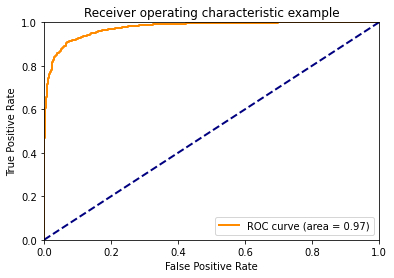

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(repeated_val_dataset.classes, preds_repeated_val_dataset)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
lw=lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### Evaluating the model on only DBM images

In [ ]:
val_DBM = ImageDataGenerator(rescale=1/255)

val_dataset_DBM = val_DBM.flow_from_directory("dataset/validation/", 
                                              target_size = (150,150),
                                              batch_size = 4,
                                              classes = ['DBM'],
                                              class_mode = None,
                                              shuffle = False)

preds_val_dataset_DBM = classifier_model.predict(val_dataset_DBM, verbose=1)

Found 1950 images belonging to 1 classes.
488/488 [==============================] - 6s 12ms/step


In [ ]:
DBM_correct = 0
DBM_wrong = 0

for pred in preds_val_dataset_DBM:
  #print(pred)
  if pred > 0.5:
    DBM_correct += 1
  else:
    DBM_wrong += 1

print("DBM: ", DBM_correct)
print("non-DBM: ", DBM_wrong)

DBM:  1773
non-DBM:  177


### Evaluating the model on only non-DBM images

In [ ]:
val_nonDBM = ImageDataGenerator(rescale=1/255)

val_dataset_nonDBM = val_nonDBM.flow_from_directory("dataset/validation/", 
                                                    target_size=(150,150),
                                                    batch_size = 4,
                                                    classes = ['non-DBM'],
                                                    class_mode = None,
                                                    shuffle = False)

preds_val_dataset_nonDBM = classifier_model.predict(val_dataset_nonDBM, verbose=1)

Found 1675 images belonging to 1 classes.
419/419 [==============================] - 5s 12ms/step


In [ ]:
nonDBM_correct = 0
nonDBM_wrong = 0

for pred in preds_val_dataset_nonDBM:
  #print(pred)
  if pred > 0.5:
    nonDBM_wrong += 1
  else:
    nonDBM_correct += 1

print("DBM: ", nonDBM_wrong)
print("non-DBM: ", nonDBM_correct)

DBM:  118
non-DBM:  1557


In [ ]:
print("TP:", DBM_correct)
print("TN:", nonDBM_correct)
print("FP:", nonDBM_wrong)
print("FN:", DBM_wrong)

actual_accuracy = (DBM_correct + nonDBM_correct)/(DBM_correct + nonDBM_correct + DBM_wrong + nonDBM_wrong)
DBM_accuracy = DBM_correct/(DBM_correct + DBM_wrong)
nonDBM_accuracy = nonDBM_correct/(nonDBM_correct + nonDBM_wrong)

print("Accuracy:", actual_accuracy)
print("DBM Accuracy:", DBM_accuracy)
print("non-DBM Accuracy:", nonDBM_accuracy)

TP: 1773
TN: 1557
FP: 118
FN: 177
Accuracy: 0.9186206896551724
DBM Accuracy: 0.9092307692307692
non-DBM Accuracy: 0.9295522388059702


## Evaluating the model on test dataset

In [ ]:
test = ImageDataGenerator(rescale=1/255)

classifier_test_dataset = test.flow_from_directory("dataset/test/",
                                                   target_size = (150,150),
                                                   batch_size = 4,
                                                   classes = ['non-DBM', 'DBM'],
                                                   class_mode = 'binary',
                                                   shuffle = False)

preds_test_dataset = classifier_model.predict(classifier_test_dataset, verbose=1)

Found 2922 images belonging to 2 classes.
731/731 [==============================] - 8s 11ms/step


In [ ]:
#classifier_model.evaluate(classifier_test_dataset)

In [ ]:
print(classifier_test_dataset.class_indices)

{'non-DBM': 0, 'DBM': 1}


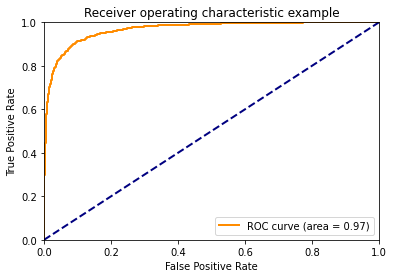

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(classifier_test_dataset.classes, preds_test_dataset)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
lw=lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### Evaluating the model on only DBM images

In [ ]:
test_DBM = ImageDataGenerator(rescale=1/255)

test_dataset_DBM = test_DBM.flow_from_directory("dataset/test/", 
                                                target_size = (150,150),
                                                batch_size = 4,
                                                classes = ['DBM'],
                                                class_mode = None,
                                                shuffle = False)

preds_test_dataset_DBM = classifier_model.predict(test_dataset_DBM, verbose=1)

Found 1251 images belonging to 1 classes.
313/313 [==============================] - 3s 11ms/step


In [ ]:
DBM_correct = 0
DBM_wrong = 0

for pred in preds_test_dataset_DBM:
  #print(pred)
  if pred > 0.5:
    DBM_correct += 1
  else:
    DBM_wrong += 1

print("DBM: ", DBM_correct)
print("non-DBM: ", DBM_wrong)

DBM:  1089
non-DBM:  162


### Evaluating the model on only non-DBM images

In [ ]:
test_nonDBM = ImageDataGenerator(rescale=1/255)

test_dataset_nonDBM = test_nonDBM.flow_from_directory("dataset/test/",
                                                      target_size=(150,150),
                                                      batch_size = 4,
                                                      classes = ['non-DBM'],
                                                      class_mode = None,
                                                      shuffle = False)

preds_test_dataset_nonDBM = classifier_model.predict(test_dataset_nonDBM, verbose=1)

Found 1671 images belonging to 1 classes.
418/418 [==============================] - 5s 11ms/step


In [ ]:
nonDBM_correct = 0
nonDBM_wrong = 0

for pred in preds_test_dataset_nonDBM:
  #print(pred)
  if pred > 0.5:
    nonDBM_wrong += 1
  else:
    nonDBM_correct += 1

print("DBM: ", nonDBM_wrong)
print("non-DBM: ", nonDBM_correct)

DBM:  115
non-DBM:  1556


In [ ]:
print("TP:", DBM_correct)
print("TN:", nonDBM_correct)
print("FP:", nonDBM_wrong)
print("FN:", DBM_wrong)

actual_accuracy = (DBM_correct + nonDBM_correct)/(DBM_correct + nonDBM_correct + DBM_wrong + nonDBM_wrong)
DBM_accuracy = DBM_correct/(DBM_correct + DBM_wrong)
nonDBM_accuracy = nonDBM_correct/(nonDBM_correct + nonDBM_wrong)

print("Accuracy:", actual_accuracy)
print("DBM Accuracy:", DBM_accuracy)
print("non-DBM Accuracy:", nonDBM_accuracy)

TP: 1089
TN: 1556
FP: 115
FN: 162
Accuracy: 0.905201916495551
DBM Accuracy: 0.8705035971223022
non-DBM Accuracy: 0.931178934769599


# Using the Binary Image Classification model to predict on RoIs generated by the Mask R-CNN model

### Using the Binary Image Classification model to predict on RoIs generated by the Mask R-CNN model on test dataset images

In [ ]:
datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
os.makedirs('RoIs detected')

In [ ]:
#os.makedirs('/gdrive/My Drive/DBM Mask RCNN/DBM Model Results/change this name')

In [ ]:
APs = []
mPrecision = []
mRecall = []
list_accuracy = []

for image_id in mrcnn_gt_test_dataset.image_ids:
  image, image_meta, gt_class_id, gt_bbox, gt_mask = model.load_image_gt(mrcnn_gt_test_dataset, DBM_config, image_id, use_mini_mask=False)

  #print("=============================================================================================================================")
  print("image_id: ", image_id)
  info = mrcnn_gt_test_dataset.image_info[image_id]
  results = mrcnn_model.detect([image], verbose=0)
  r = results[0]

  ######## PASSING THE CROPPED PREDICTIONS PRODUCED BY THE MASK R-CNN MODEL TO THE BINARY CLASSIFICATION MODEL FOR CLASSIFICATION ########

  roi_total_num = len(r['rois'])
  #print(roi_total_num)
  roi_num = 0
  correct_gt_num = 0
  while roi_num < roi_total_num:
    os.makedirs('RoIs detected/image')
    x,y,w,h = r['rois'][correct_gt_num]
    RoI = image[x:w, y:h]

    RoI_resized_padded, window, scale, padding, _ = utils.resize_image(RoI, 
                                                                       min_dim=150, 
                                                                       max_dim=150, 
                                                                       mode="square")

    plt.imsave('RoIs detected/image/%s-%s.png' % (str(info["id"]), str(roi_num)), RoI_resized_padded)
    #plt.imshow(RoI_resized_padded)
    #plt.show()
    
    RoI_image = datagen.flow_from_directory("RoIs detected/",
                                            target_size = (150,150),
                                            batch_size = 1,
                                            class_mode = None,
                                            shuffle = False)

    RoI_image_prediction = classifier_model.predict(RoI_image, verbose=0)
    #print(RoI_image_prediction[0])

    shutil.rmtree('RoIs detected/image')

    if RoI_image_prediction[0] > 0.5:
      #print("DBM")
      correct_gt_num += 1

    else:
      #print("non-DBM")

      #print(len(r['rois']))
      #print(len(r['class_ids']))
      #print(len(r['scores']))
      #print(r['masks'].shape[-1])

      r['rois'] = np.delete(r['rois'], correct_gt_num, axis=0)
      r['class_ids'] = np.delete(r['class_ids'], correct_gt_num)
      r['scores'] = np.delete(r['scores'], correct_gt_num)
      r['masks'] = np.delete(r['masks'], correct_gt_num, axis=2)

      #print(len(r['rois']))
      #print(len(r['class_ids']))
      #print(len(r['scores']))
      #print(r['masks'].shape[-1])

    roi_num += 1
    #print(roi_num)

  ############## DISPLAYING FINAL ANNOTATIONS AND CALCULATING ACCURACY OF SYSTEM AFTER PASSING THE IMAGE THROUGH BOTH MODELS ##############

  if len(gt_bbox) != 0:
    
    AP, precisions, recalls, _ =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r['rois'], r['class_ids'], r['scores'], r['masks'], iou_threshold=0.5)

    APs.append(AP)
    mPrecision.append(precisions[-2])
    recall, _ = utils.compute_recall(r['rois'], gt_bbox, 0.5)
    mRecall.append(recall)

    gt_match, pred_match, overlaps = utils.compute_matches(gt_bbox, gt_class_id, gt_mask, 
                                                           r['rois'], r['class_ids'], r['scores'], r['masks'], 
                                                           iou_threshold=0.5)
    
    TP = np.sum(pred_match > -1)
    FP = np.sum(pred_match == -1)
    FN = len(gt_match) - np.sum(pred_match > -1)

    dict_accuracy = {
      "image_id": image_id,
      "AP": AP,
      "Precision": precisions[-2],
      "Recall": recall,
      "TP": TP,
      "FP": FP,
      "FN": FN,
      "GT": len(gt_bbox)
    }

    list_accuracy.append(dict_accuracy)

  else:
    dict_accuracy = {
      "image_id": image_id,
      "TP": 0,
      "FP": len(r['rois']),
      "GT": 0
    }

    list_accuracy.append(dict_accuracy)

image_id:  0
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
image_id:  1
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.

In [ ]:
print(list_accuracy)

[{'image_id': 0, 'TP': 0, 'FP': 1, 'GT': 0}, {'image_id': 1, 'TP': 0, 'FP': 14, 'GT': 0}, {'image_id': 2, 'AP': 0.8859467471448275, 'Precision': 0.8125, 'Recall': 1.0, 'TP': 13, 'FP': 3, 'FN': 0, 'GT': 13}, {'image_id': 3, 'AP': 0.8333333134651184, 'Precision': 1.0, 'Recall': 0.8333333333333334, 'TP': 5, 'FP': 0, 'FN': 1, 'GT': 6}, {'image_id': 4, 'AP': 1.0, 'Precision': 0.6666666666666666, 'Recall': 1.0, 'TP': 2, 'FP': 1, 'FN': 0, 'GT': 2}, {'image_id': 5, 'TP': 0, 'FP': 1, 'GT': 0}, {'image_id': 6, 'AP': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'TP': 1, 'FP': 0, 'FN': 0, 'GT': 1}, {'image_id': 7, 'AP': 0.8975069460115934, 'Precision': 0.9473684210526315, 'Recall': 0.9473684210526315, 'TP': 18, 'FP': 1, 'FN': 1, 'GT': 19}, {'image_id': 8, 'AP': 0.3784909375345067, 'Precision': 0.6595744680851063, 'Recall': 0.4838709677419355, 'TP': 31, 'FP': 16, 'FN': 31, 'GT': 62}, {'image_id': 9, 'AP': 0.7287405012055553, 'Precision': 0.7868852459016393, 'Recall': 0.8571428571428571, 'TP': 48, 'FP': 13

In [ ]:
more_than_37_correct = 0
more_than_37_wrong = 0
less_than_38_correct = 0
less_than_38_wrong = 0
more_than_37_wrong_list = []
less_than_38_wrong_list = []
deviation_more_than_37_list = []
deviation_less_than_38_list = []

for dicts in list_accuracy:
  if dicts['GT'] > 37:
    deviation_more_than_37_list.append((dicts['TP'] + dicts['FP']) - dicts['GT'])
    if (dicts['TP'] + dicts['FP']) > 37:
      more_than_37_correct += 1
    else:
      more_than_37_wrong += 1
      more_than_37_wrong_list.append("GTs:" + str(dicts['GT']) + "/" + "Preds:" + str(dicts['TP'] + dicts['FP']))
      print("Wrong 38 or more DBMs:", dicts['image_id'])
  
  else:
    deviation_less_than_38_list.append((dicts['TP'] + dicts['FP']) - dicts['GT'])
    if (dicts['TP'] + dicts['FP']) < 38:
      less_than_38_correct += 1
    else:
      less_than_38_wrong += 1
      less_than_38_wrong_list.append("GTs:" + str(dicts['GT']) + "/" + "Preds:" + str(dicts['TP'] + dicts['FP']))
      print("Wrong less than 38 DBMs:", dicts['image_id'])

print("\nTotal num of images with 38 or more DBMs:", more_than_37_correct + more_than_37_wrong)
print("Correctly identified:", more_than_37_correct)
print("Wrongly identified:", more_than_37_wrong, more_than_37_wrong_list)

print("Mean deviation:", np.mean(deviation_more_than_37_list))
print("Maximum deviation:", max(deviation_more_than_37_list))
print("Minimum deviation:", min(deviation_more_than_37_list))
print("Standard deviation:", np.std(deviation_more_than_37_list))


print("\nTotal num of images with less than 38 DBMs:", less_than_38_correct + less_than_38_wrong)
print("Correctly identified:", less_than_38_correct)
print("Wrongly identified:", less_than_38_wrong, less_than_38_wrong_list)

print("Mean deviation:", np.mean(deviation_less_than_38_list))
print("Maximum deviation:", max(deviation_less_than_38_list))
print("Minimum deviation:", min(deviation_less_than_38_list))
print("Standard deviation:", np.std(deviation_less_than_38_list))

Wrong 38 or more DBMs: 87

Total num of images with 38 or more DBMs: 12
Correctly identified: 11
Wrongly identified: 1 ['GTs:38/Preds:28']
Mean deviation: -10.583333333333334
Maximum deviation: 5
Minimum deviation: -28
Standard deviation: 9.707886255800258

Total num of images with less than 38 DBMs: 98
Correctly identified: 98
Wrongly identified: 0 []
Mean deviation: 1.7040816326530612
Maximum deviation: 25
Minimum deviation: -7
Standard deviation: 4.238331361282408


In [ ]:
print(deviation_more_than_37_list)
print(deviation_less_than_38_list)

[-15, 5, 0, -2, -8, -14, -6, -25, -10, -4, -28, -20]
[1, 14, 3, -1, 1, 1, 0, 0, 0, 14, 5, 0, 8, 0, 2, 1, 1, 0, 14, 0, -2, 2, 5, 0, 1, 0, -1, 0, 0, 25, 1, 0, 3, 0, 1, 5, 0, 0, 0, 0, 12, 1, 8, 7, -2, 6, 2, 1, 0, 0, 4, 0, 2, 1, 4, 0, 0, 1, 0, 0, -1, 1, 4, 0, 0, 13, -2, 1, -1, -3, 0, 2, 1, 2, 2, -3, -7, 0, -1, 1, 0, 0, 1, 3, 3, 0, -1, -2, -2, 1, 0, 2, 0, 0, 2, 0, 0, 0]


In [ ]:
image_ids_more_than_37_GTs = []
AP_more_than_37_GTs = []
precision_more_than_37_GTs = []
recall_more_than_37_GTs = []

for dicts in list_accuracy:
  if dicts['GT'] > 37:
    image_ids_more_than_37_GTs.append(dicts['image_id'])
    AP_more_than_37_GTs.append(dicts['AP'])
    precision_more_than_37_GTs.append(dicts['Precision'])
    recall_more_than_37_GTs.append(dicts['Recall'])

print(image_ids_more_than_37_GTs)
print(len(image_ids_more_than_37_GTs))

print("New mAP:", np.mean(AP_more_than_37_GTs))
print("New Mean Precision:", np.mean(precision_more_than_37_GTs))
print("New Mean Recall:", np.mean(recall_more_than_37_GTs))

[8, 9, 21, 38, 48, 71, 72, 74, 87, 97, 104, 106]
12
New mAP: 0.7219205741455283
New Mean Precision: 0.8810970681717197
New Mean Recall: 0.7669879737594713


image_id:  87


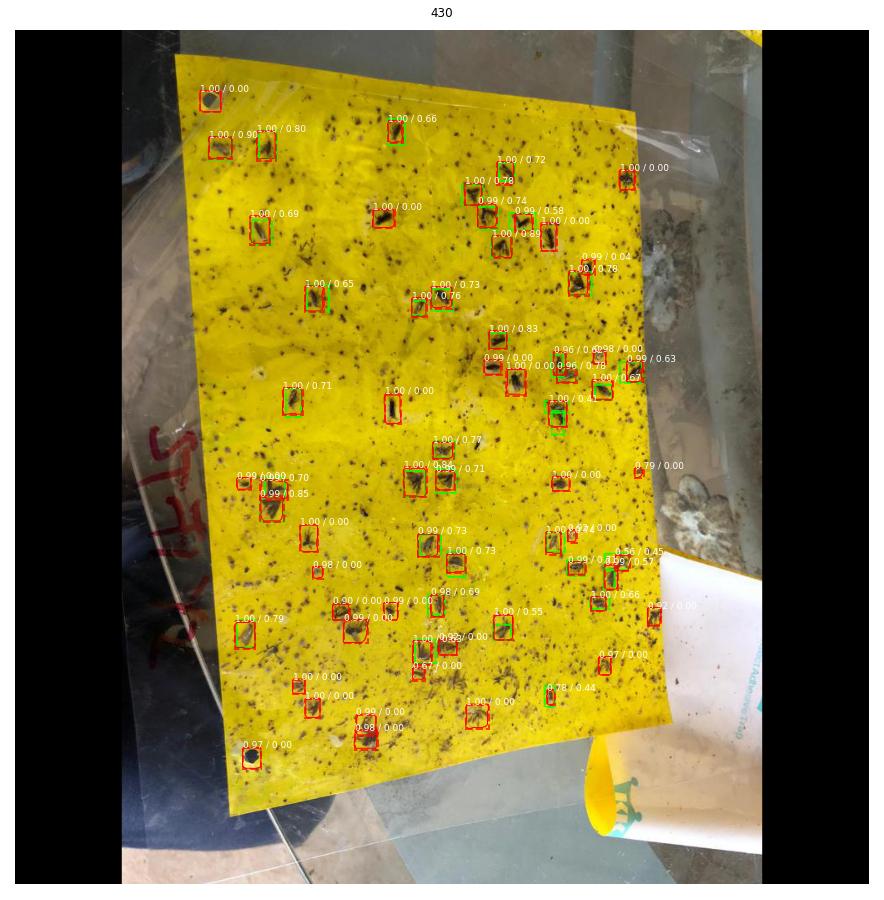

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging 

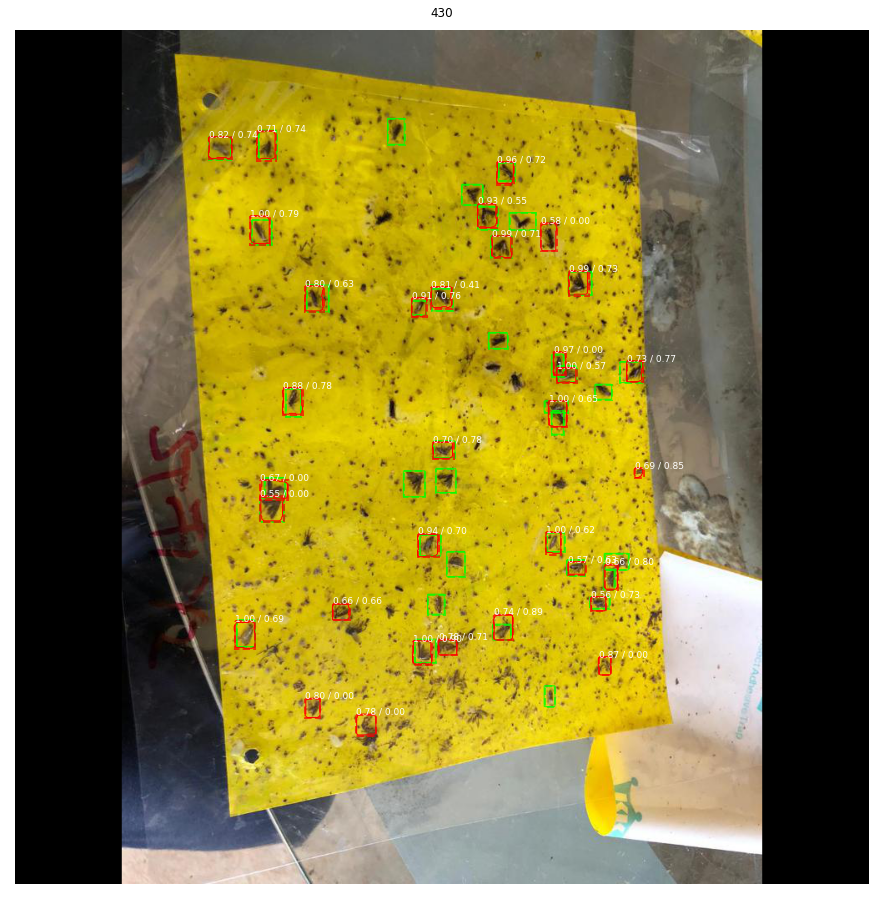

GTs: 38
Num of predictions: 33

AP: 0.5744795383635346
precision value: 0.7575757575757576
recall value: 0.6578947368421053


In [ ]:
for image_id in [87]:
  image, image_meta, gt_class_id, gt_bbox, gt_mask = model.load_image_gt(mrcnn_gt_test_dataset, DBM_config, image_id, use_mini_mask=False)

  #print("=============================================================================================================================")
  print("image_id: ", image_id)
  info = mrcnn_gt_test_dataset.image_info[image_id]
  results = mrcnn_model.detect([image], verbose=0)
  r = results[0]


  ####################### DISPLAYING INITIAL ANNOTATIONS AFTER PASSING THE IMAGE THROUGH THE MASK R-CNN MODEL ONLY #######################

  if len(gt_bbox) != 0:
    visualize.display_differences(image, gt_bbox, gt_class_id, gt_mask, 
                                  r['rois'], r['class_ids'], r['scores'], r['masks'], 
                                  mrcnn_gt_test_dataset.class_names, title=str(info["id"]), 
                                  ax=None, show_mask=False, show_box=True, 
                                  iou_threshold=0.5, score_threshold=0.5, save_image=False, filename = int(info["id"]))
  else:
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                mrcnn_gt_test_dataset.class_names, r['scores'], 
                                title=str(info["id"]), show_mask = False, save_image = False, filename = int(info["id"]))
    
  
  ######## PASSING THE CROPPED PREDICTIONS PRODUCED BY THE MASK R-CNN MODEL TO THE BINARY CLASSIFICATION MODEL FOR CLASSIFICATION ########

  roi_total_num = len(r['rois'])
  #print(roi_total_num)
  roi_num = 0
  correct_gt_num = 0
  while roi_num < roi_total_num:
    os.makedirs('RoIs detected/image')
    x,y,w,h = r['rois'][correct_gt_num]
    RoI = image[x:w, y:h]


    ############# RESIZING AND PADDING MISSING FROM HERE, CAUSING THE NUMBER OF PREDICTIONS TO BE DIFFERENT FROM THE ONE SHOWN ON TOP #############
    

    plt.imsave('RoIs detected/image/%s-%s.png' % (str(info["id"]), str(roi_num)), RoI)
    #plt.imshow(RoI)
    #plt.show()
    
    RoI_image = datagen.flow_from_directory("RoIs detected/",
                                            target_size = (150,150),
                                            batch_size = 1,
                                            class_mode = None,
                                            shuffle = False)

    RoI_image_prediction = classifier_model.predict(RoI_image, verbose=0)
    #print(RoI_image_prediction[0])

    shutil.rmtree('RoIs detected/image')

    if RoI_image_prediction[0] > 0.5:
      #print("DBM")
      r['scores'][correct_gt_num] = RoI_image_prediction[0]
      correct_gt_num += 1

    else:
      #print("non-DBM")

      #print(len(r['rois']))
      #print(len(r['class_ids']))
      #print(len(r['scores']))
      #print(r['masks'].shape[-1])

      r['rois'] = np.delete(r['rois'], correct_gt_num, axis=0)
      r['class_ids'] = np.delete(r['class_ids'], correct_gt_num)
      r['scores'] = np.delete(r['scores'], correct_gt_num)
      r['masks'] = np.delete(r['masks'], correct_gt_num, axis=2)

      #print(len(r['rois']))
      #print(len(r['class_ids']))
      #print(len(r['scores']))
      #print(r['masks'].shape[-1])

    roi_num += 1
    #print(roi_num)

  ############## DISPLAYING FINAL ANNOTATIONS AND CALCULATING ACCURACY OF SYSTEM AFTER PASSING THE IMAGE THROUGH BOTH MODELS ##############

  if len(gt_bbox) != 0:
    visualize.display_differences(image, gt_bbox, gt_class_id, gt_mask, 
                                  r['rois'], r['class_ids'], r['scores'], r['masks'], 
                                  mrcnn_gt_test_dataset.class_names, title=str(info["id"]), 
                                  ax=None, show_mask=False, show_box=True, 
                                  iou_threshold=0.5, score_threshold=0.5, save_image=False, filename = str(info["id"])+"(1)")

    AP, precisions, recalls, _ =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r['rois'], r['class_ids'], r['scores'], r['masks'], iou_threshold=0.5)

    recall, _ = utils.compute_recall(r['rois'], gt_bbox, 0.5)

    print("GTs:", len(gt_bbox))
    print("Num of predictions:", len(r['rois']))
    print("\nAP:", AP)
    print("precision value:", precisions[-2])
    print("recall value:", recall)

  else:
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                mrcnn_gt_test_dataset.class_names, r['scores'], 
                                title=str(info["id"]), show_mask = False, save_image = False, filename = str(info["id"])+"(1)")
    
    print("GTs: 0")
    print("Num of predictions:", len(r['rois']))